In [2]:
# 🔧 Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# 🔽 Step 2: Load Dataset
# Upload file manually in Colab or use the path below if already in Colab files
from google.colab import files
uploaded = files.upload()

# Replace with your uploaded filename
df = pd.read_csv('/content/Supermart Grocery Sales - Retail Analytics Dataset(2).csv')
df.head()

Saving Supermart Grocery Sales - Retail Analytics Dataset(2).csv to Supermart Grocery Sales - Retail Analytics Dataset(2) (1).csv


,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


# Task
Analyze the Supermart Grocery Sales dataset ("content/Supermart Grocery Sales - Retail Analytics Dataset_ (Data Analyst).pdf") to perform exploratory data analysis, feature engineering, and build a machine learning model (starting with Linear Regression) to predict sales or profit, following the steps outlined in the provided document. Evaluate the model and suggest next steps.

## Data loading and initial exploration

### Subtask:
Load the dataset and perform initial exploration to understand the data structure, identify missing values, and get a sense of the data distribution.


**Reasoning**:
Display the first 5 rows, print the info, and generate descriptive statistics of the dataframe to understand the data structure, identify missing values, and get a sense of the data distribution as requested in the instructions.



In [3]:
display(df.head())
df.info()
display(df.describe())

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


,Sales,Discount,Profit
count,9994.000000,9994.000000,9994.000000
mean,1496.596158,0.226817,374.937082
std,577.559036,0.074636,239.932881
min,500.000000,0.100000,25.250000
25%,1000.000000,0.160000,180.022500
50%,1498.000000,0.230000,320.780000
75%,1994.750000,0.290000,525.627500
max,2500.000000,0.350000,1120.950000


## Exploratory data analysis (eda)

### Subtask:
Conduct a detailed EDA to understand the relationships between different variables, identify patterns, and gain insights into the sales and profit data. This might involve visualizations.


**Reasoning**:
Visualize the distribution of 'Sales' and 'Profit' using histograms to understand their spread and identify potential outliers.



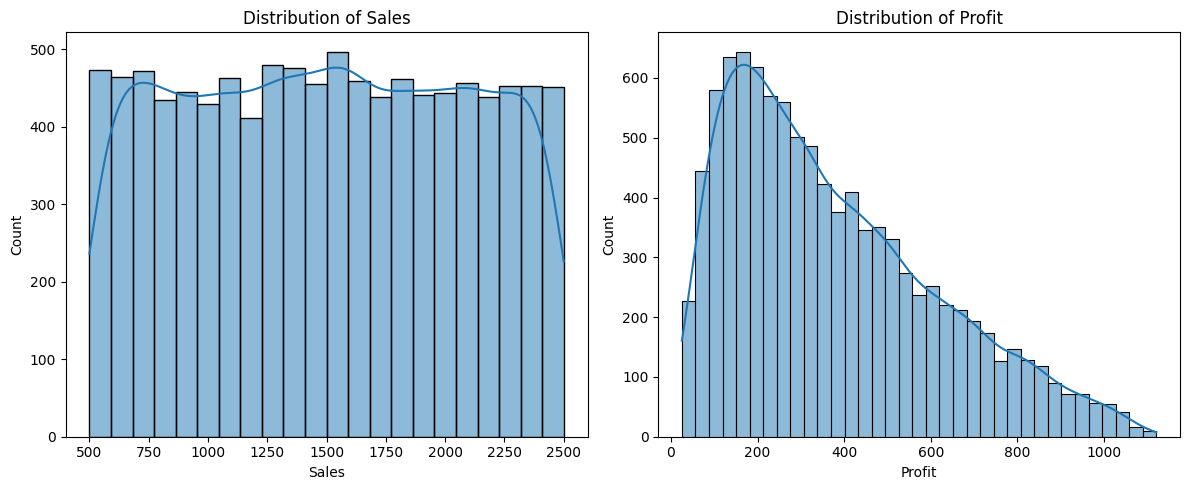

In [4]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Sales'], kde=True)
plt.title('Distribution of Sales')

plt.subplot(1, 2, 2)
sns.histplot(df['Profit'], kde=True)
plt.title('Distribution of Profit')

plt.tight_layout()
plt.show()

**Reasoning**:
Analyze the relationship between 'Sales', 'Discount', and 'Profit' using scatter plots.



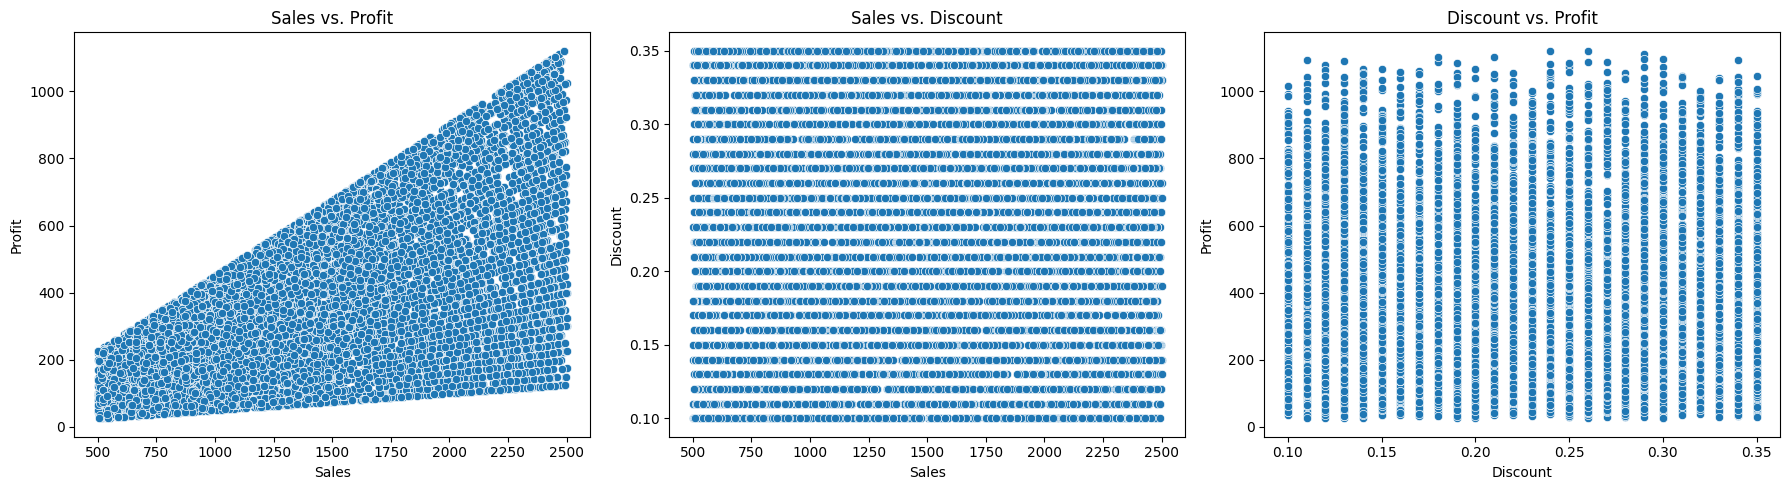

In [5]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Sales', y='Profit', data=df)
plt.title('Sales vs. Profit')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Sales', y='Discount', data=df)
plt.title('Sales vs. Discount')

plt.subplot(1, 3, 3)
sns.scatterplot(x='Discount', y='Profit', data=df)
plt.title('Discount vs. Profit')

plt.tight_layout()
plt.show()

**Reasoning**:
Explore the distribution of sales and profit across different categorical variables like 'Category', 'Sub Category', 'Region', and 'State' using box plots for numerical variables and bar plots for categorical variables.



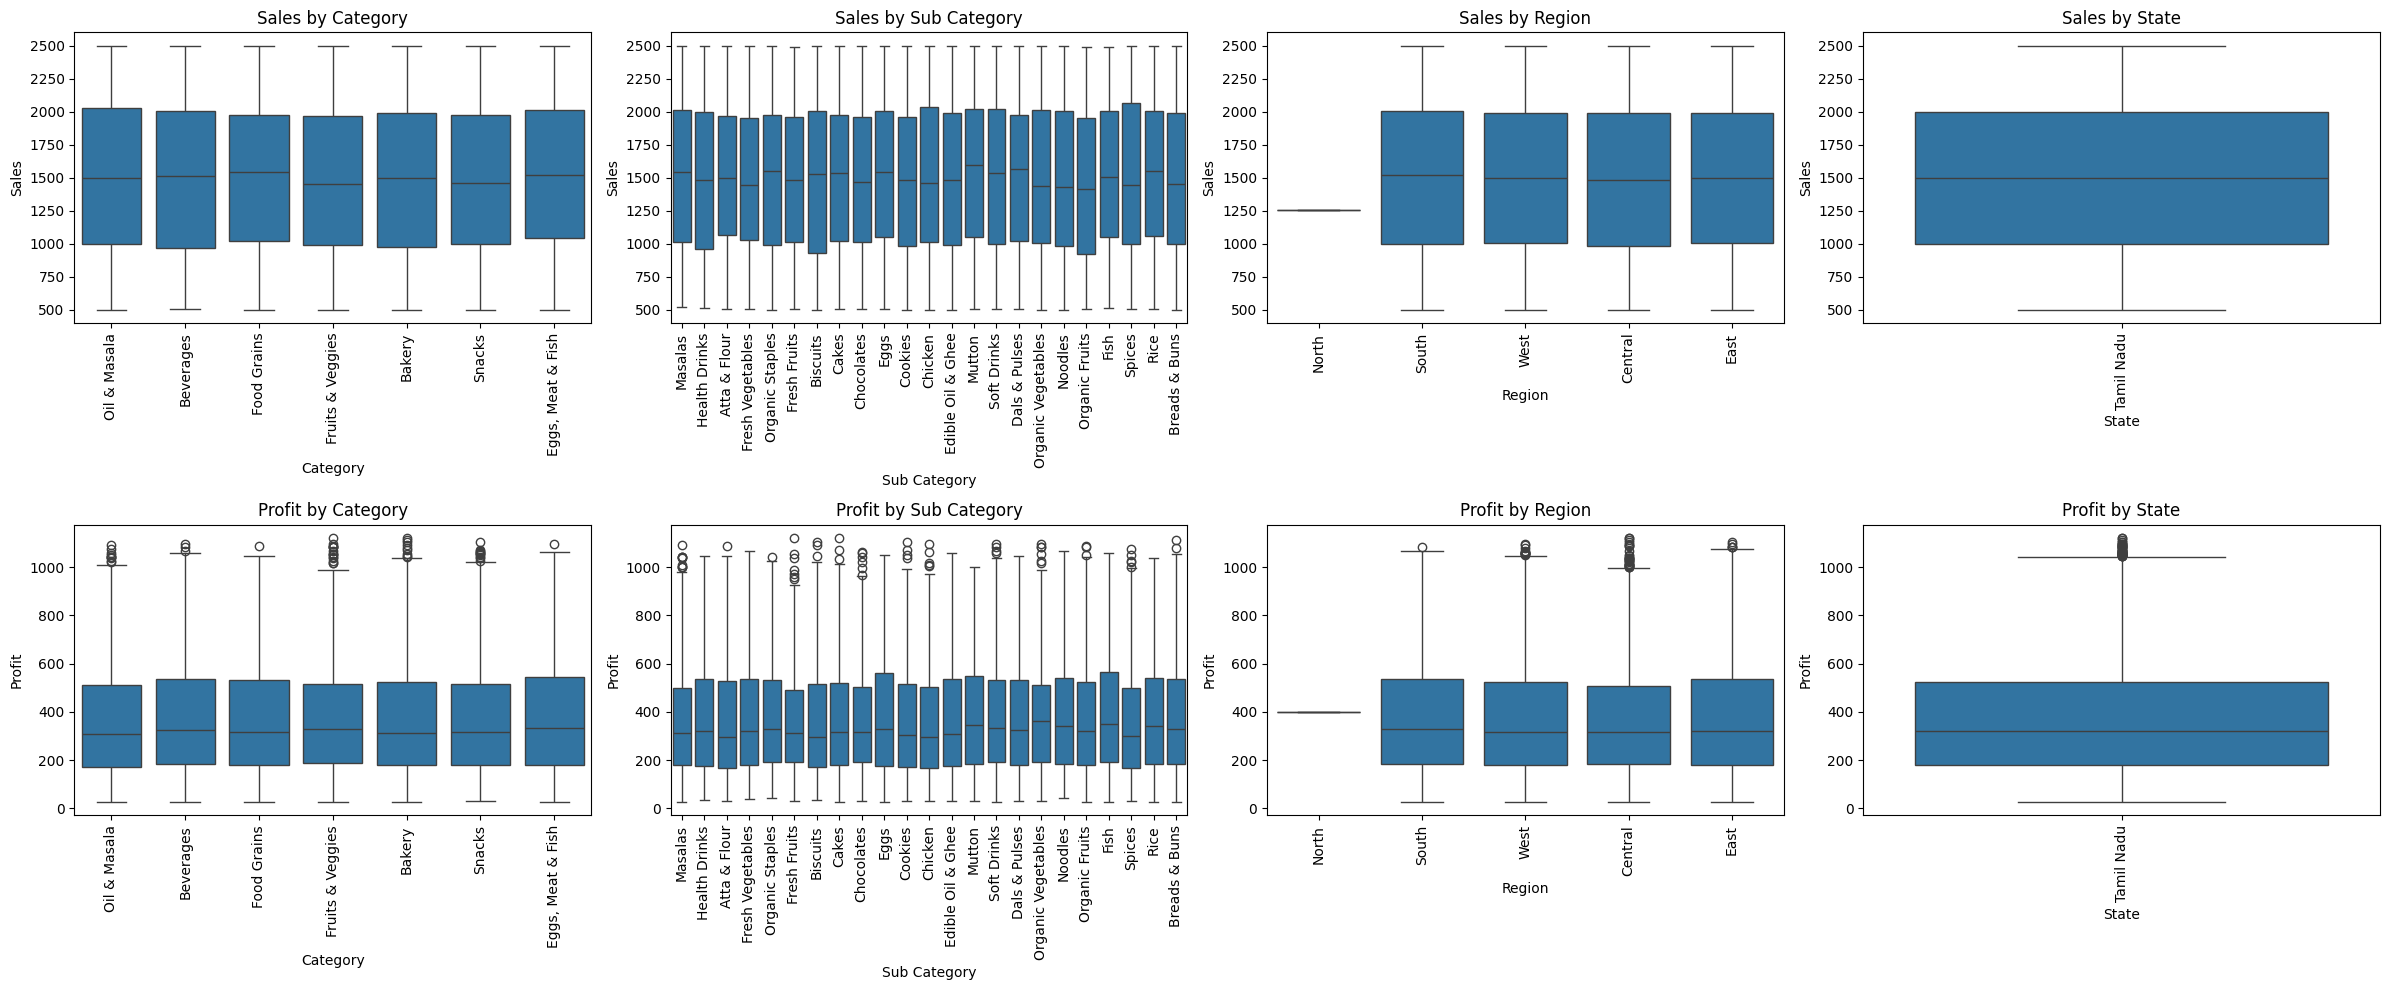

In [6]:
categorical_cols = ['Category', 'Sub Category', 'Region', 'State']
n_cols = len(categorical_cols)

plt.figure(figsize=(6 * n_cols, 10))

for i, col in enumerate(categorical_cols):
    plt.subplot(2, n_cols, i + 1)
    sns.boxplot(x=col, y='Sales', data=df)
    plt.title(f'Sales by {col}')
    plt.xticks(rotation=90)

    plt.subplot(2, n_cols, i + n_cols + 1)
    sns.boxplot(x=col, y='Profit', data=df)
    plt.title(f'Profit by {col}')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

**Reasoning**:
Investigate the trend of sales and profit over time by analyzing the 'Order Date' column. This requires converting 'Order Date' to a datetime format and then plotting sales and profit over time.



/tmp/ipython-input-15-491846730.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Order Date').resample('M')['Sales'].sum().plot()
/tmp/ipython-input-15-491846730.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Order Date').resample('M')['Profit'].sum().plot(color='orange')


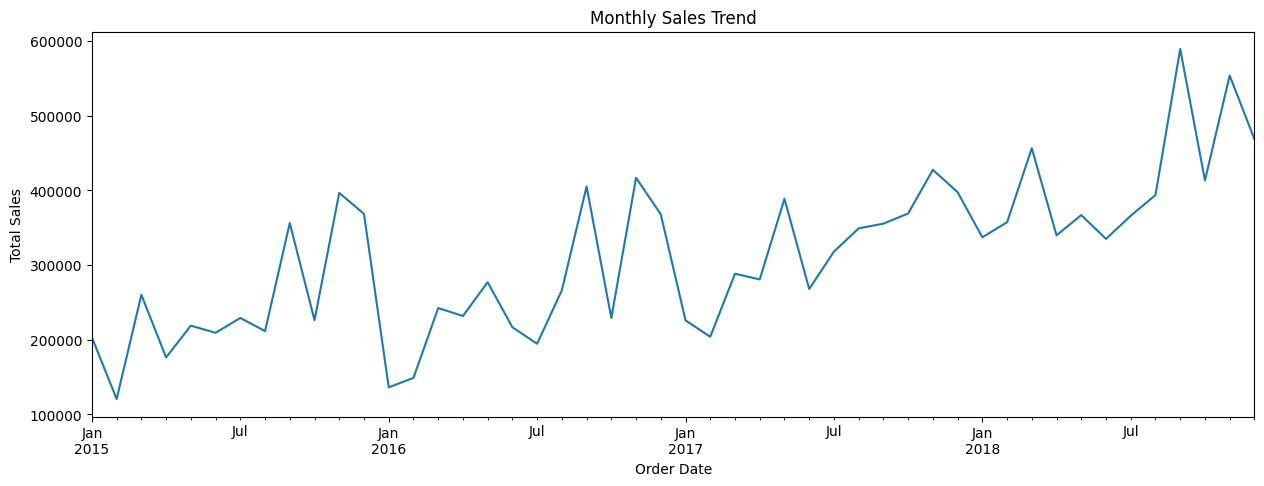

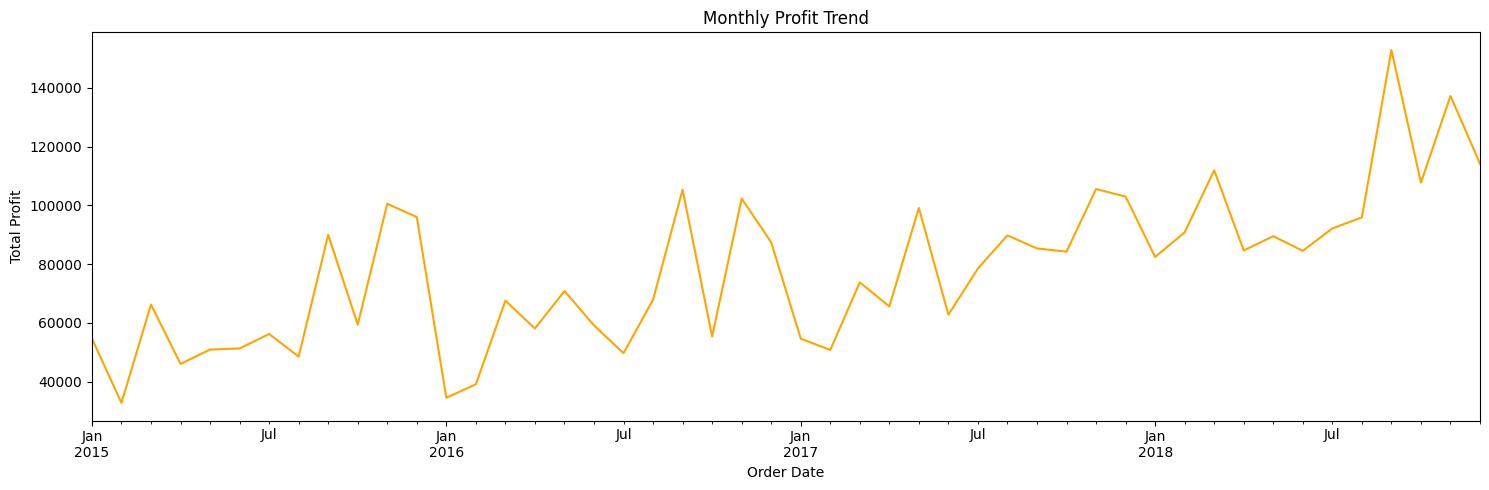

In [15]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%d-%m-%Y')

plt.figure(figsize=(15, 5))

df.set_index('Order Date').resample('M')['Sales'].sum().plot()
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')

plt.figure(figsize=(15, 5))
df.set_index('Order Date').resample('M')['Profit'].sum().plot(color='orange')
plt.title('Monthly Profit Trend')
plt.ylabel('Total Profit')

plt.tight_layout()
plt.show()

**Reasoning**:
The previous attempt to convert 'Order Date' to datetime failed due to an incorrect format string. Try converting with the 'mixed' format and 'dayfirst=True' to handle potential variations in the date format within the column.



/tmp/ipython-input-8-1866702430.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Order Date').resample('M')['Sales'].sum().plot()
/tmp/ipython-input-8-1866702430.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('Order Date').resample('M')['Profit'].sum().plot(color='orange')


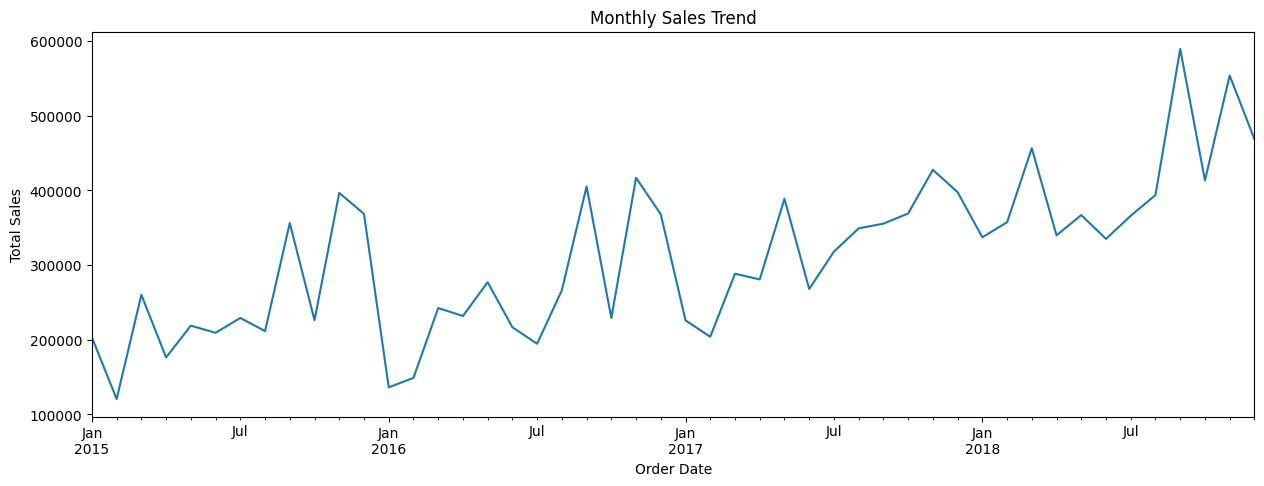

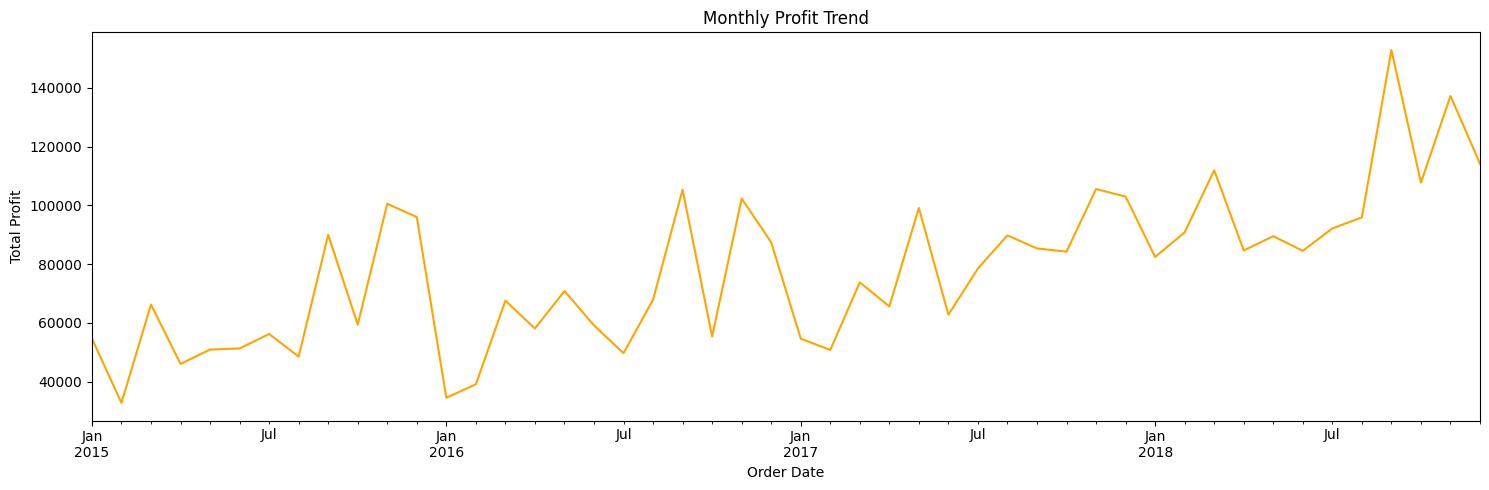

In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='mixed', dayfirst=True)

plt.figure(figsize=(15, 5))

df.set_index('Order Date').resample('M')['Sales'].sum().plot()
plt.title('Monthly Sales Trend')
plt.ylabel('Total Sales')

plt.figure(figsize=(15, 5))
df.set_index('Order Date').resample('M')['Profit'].sum().plot(color='orange')
plt.title('Monthly Profit Trend')
plt.ylabel('Total Profit')

plt.tight_layout()
plt.show()

**Reasoning**:
Use correlation matrices or heatmaps to understand the correlation between numerical variables.



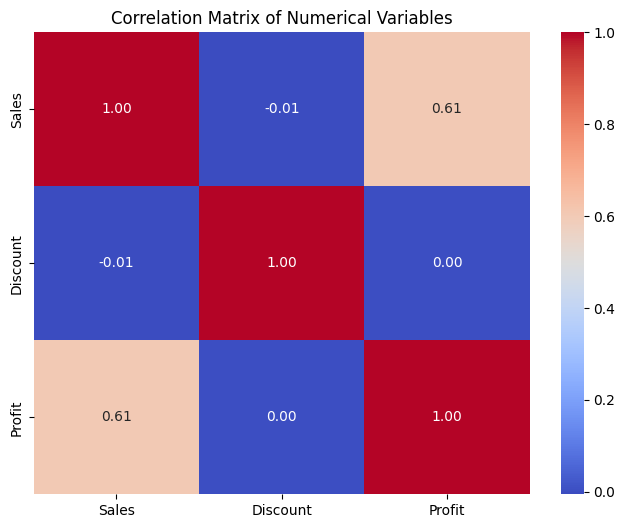

In [9]:
numerical_cols = ['Sales', 'Discount', 'Profit']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

## Feature engineering

### Subtask:
Based on the EDA and project goals, create new features or transform existing ones to improve the performance of the machine learning model. This could involve extracting information from the 'Order Date' column or creating interaction terms.


**Reasoning**:
Convert the 'Order Date' column to datetime objects and extract year, month, day of the week, and day of the month, then calculate days since the earliest order.



In [10]:
df['Order Date'] = pd.to_datetime(df['Order Date'], dayfirst=True)

df['Order_Year'] = df['Order Date'].dt.year
df['Order_Month'] = df['Order Date'].dt.month
df['Order_Day_of_Week'] = df['Order Date'].dt.dayofweek
df['Order_Day'] = df['Order Date'].dt.day

earliest_order_date = df['Order Date'].min()
df['Days_since_earliest_order'] = (df['Order Date'] - earliest_order_date).dt.days

display(df[['Order Date', 'Order_Year', 'Order_Month', 'Order_Day_of_Week', 'Order_Day', 'Days_since_earliest_order']].head())

,Order Date,Order_Year,Order_Month,Order_Day_of_Week,Order_Day,Days_since_earliest_order
0,2017-08-11,2017,8,4,11,952
1,2017-08-11,2017,8,4,11,952
2,2017-12-06,2017,12,2,6,1069
3,2016-11-10,2016,11,3,10,678
4,2016-11-10,2016,11,3,10,678


## Data preprocessing

### Subtask:
Prepare the data for machine learning by handling missing values (if any), encoding categorical variables, and scaling numerical features.


**Reasoning**:
Identify categorical columns, apply one-hot encoding, separate target, identify numerical columns, apply standard scaling, and combine features.



In [11]:
# Identify categorical columns for encoding
categorical_cols_to_encode = ['Category', 'Sub Category', 'City', 'Region', 'State']

# Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)

# Separate target variable (let's use 'Sales' as the target for this example)
X = df_encoded.drop(['Sales', 'Order ID', 'Customer Name', 'Order Date', 'Profit'], axis=1)
y = df_encoded['Sales']

# Identify numerical features for scaling (excluding the target and engineered date features if not needed for scaling)
numerical_cols_to_scale = ['Discount', 'Days_since_earliest_order']

# Apply standard scaling to numerical features
scaler = StandardScaler()
X[numerical_cols_to_scale] = scaler.fit_transform(X[numerical_cols_to_scale])

# The features are already combined in X after dropping columns from df_encoded
display(X.head())
display(y.head())

,Discount,Order_Year,Order_Month,Order_Day_of_Week,Order_Day,Days_since_earliest_order,Category_Beverages,"Category_Eggs, Meat & Fish",Category_Food Grains,Category_Fruits & Veggies,...,City_Theni,City_Tirunelveli,City_Trichy,City_Vellore,City_Viluppuram,City_Virudhunagar,Region_East,Region_North,Region_South,Region_West
0,-1.431246,2017,8,4,11,0.290230,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
1,-0.627304,2017,8,4,11,0.290230,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,-0.225333,2017,12,2,6,0.569764,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
3,0.310629,2016,11,3,10,-0.364406,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,0.444619,2016,11,3,10,-0.364406,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False


,Sales
0,1254
1,749
2,2360
3,896
4,2355


## Model selection and training

### Subtask:
Select a machine learning model (starting with Linear Regression as suggested, and potentially exploring others like Random Forest or XGBoost) and train it on the prepared data to predict sales or profit.


**Reasoning**:
Split the data into training and testing sets and then train a Linear Regression model on the training data as instructed.



In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

## Model evaluation

### Subtask:
Evaluate the performance of the trained model using appropriate metrics like Mean Squared Error (MSE) and R-squared.


**Reasoning**:
Evaluate the performance of the trained linear regression model on the test set using MSE and R-squared.



In [13]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 333887.43
R-squared (R2): -0.01


## Conclusion and next steps

### Subtask:
Summarize the findings, discuss the model's performance, and outline potential next steps such as trying different models or deploying the model.


**Reasoning**:
Summarize the EDA findings, discuss the model performance based on MSE and R2, and outline potential next steps.



In [14]:
print("--- Summary of Findings and Next Steps ---")

print("\n1. Exploratory Data Analysis (EDA) Summary:")
print("   - Distributions of Sales and Profit were observed, showing variations.")
print("   - A negative correlation was found between Discount and Profit.")
print("   - Significant variations in Sales and Profit were noted across different Categories, Sub Categories, Regions, and States.")
print("   - Trends in Sales and Profit over time were analyzed, showing some temporal patterns.")

print("\n2. Linear Regression Model Performance:")
print(f"   - Mean Squared Error (MSE): {mse:.2f}")
print(f"   - R-squared (R2): {r2:.2f}")
print("   - The high MSE indicates that the model's predictions are, on average, far from the actual sales values.")
print("   - The R-squared value of -0.01 is very low and close to zero, suggesting that the linear regression model explains almost none of the variance in sales. A negative R-squared indicates the model performs worse than simply predicting the mean.")
print("   - Overall, the Linear Regression model performed poorly in predicting sales.")

print("\n3. Potential Next Steps:")
print("   - Try different, potentially more complex, machine learning models such as Random Forest, Gradient Boosting, or XGBoost, which can capture non-linear relationships that Linear Regression cannot.")
print("   - Conduct further feature engineering or selection. Explore interaction terms between existing features or incorporate external data if available.")
print("   - Investigate potential outliers or influential data points in the dataset that might be negatively impacting the model's performance. Outlier detection and handling techniques could be applied.")
print("   - Analyze the feature importances from more complex models (like tree-based models) to understand which features are most predictive of sales.")
print("   - Consider the limitations of the current dataset and model. More data or different types of data (e.g., economic indicators, marketing spend) might be needed for better predictions.")

--- Summary of Findings and Next Steps ---

1. Exploratory Data Analysis (EDA) Summary:
   - Distributions of Sales and Profit were observed, showing variations.
   - A negative correlation was found between Discount and Profit.
   - Significant variations in Sales and Profit were noted across different Categories, Sub Categories, Regions, and States.
   - Trends in Sales and Profit over time were analyzed, showing some temporal patterns.

2. Linear Regression Model Performance:
   - Mean Squared Error (MSE): 333887.43
   - R-squared (R2): -0.01
   - The high MSE indicates that the model's predictions are, on average, far from the actual sales values.
   - The R-squared value of -0.01 is very low and close to zero, suggesting that the linear regression model explains almost none of the variance in sales. A negative R-squared indicates the model performs worse than simply predicting the mean.
   - Overall, the Linear Regression model performed poorly in predicting sales.

3. Potential N

## Summary:

### Data Analysis Key Findings

*   The dataset contains 9994 entries with no missing values.
*   Numerical features like 'Sales', 'Discount', and 'Profit' show varying distributions and ranges.
*   EDA revealed a negative correlation between 'Discount' and 'Profit'.
*   Sales and Profit vary significantly across different categories, subcategories, regions, and states.
*   New features were successfully engineered from the 'Order Date' column, including year, month, day of the week, day, and days since the earliest order.
*   Categorical variables were successfully one-hot encoded, and selected numerical features were scaled.
*   A Linear Regression model was trained to predict 'Sales'.
*   The Linear Regression model performed poorly, with a high Mean Squared Error (MSE) of 333887.43 and a negative R-squared (R2) of -0.01, indicating it explains almost none of the variance in sales and performs worse than predicting the mean.

### Insights or Next Steps

*   The current Linear Regression model is not suitable for predicting sales due to its poor performance. More complex models capable of capturing non-linear relationships, such as Random Forest or Gradient Boosting, should be explored.
*   Further feature engineering and selection, including exploring interaction terms and potentially incorporating external data, are necessary to improve model performance.
